In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st # Obs! Nytt bibliotek
import numpy as np
plt.style.use("ggplot")

## Scipy stats

I denna labb kommer vi introducera biblioteket Scipy stats för att arbeta med fördelningar i python.

# 1. Diskreta fördelningar
## 1.1 Definera egna fördelningar
Nedan finns en Rademacher fördelning, den ges av:

$ P(X=1) = 0.5$

$ P(X=-1) = 0.5$

In [3]:
xk = (-1,1)  #Observera att här används en tupel
pk = (.5,.5)
rademacher = st.rv_discrete(name='rademacher', values=(xk, pk))

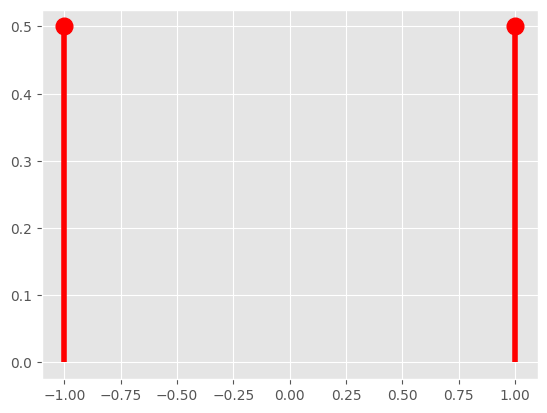

In [4]:
fig, ax = plt.subplots(1, 1)

ax.plot(xk, rademacher.pmf(xk), 'ro', ms=12, mec='r')

ax.vlines(xk, 0, rademacher.pmf(xk), colors='r', lw=4)

plt.show()


# Övning 1
Definiera en variabel bernoulli med funktionen rv_discrete som $X \sim Ber(0.75)$ Plotta sedan sannolikhetsfunktionen likt förra exemplet.

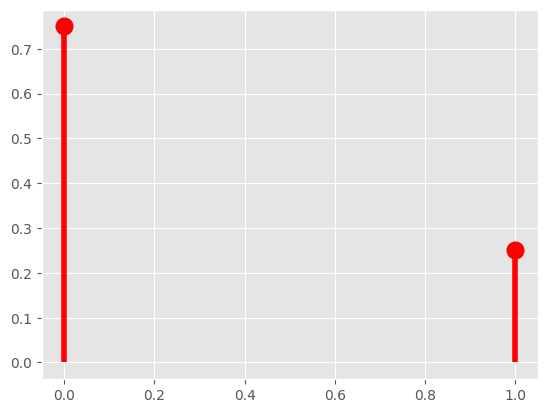

In [5]:
xk = (0, 1)  #Observera att här används en tupel
pk = (.75,.25)

bernoulli = st.rv_discrete(values = (xk, pk), name = "bernoulli")

fig, ax = plt.subplots(1, 1)

ax.plot(xk, bernoulli.pmf(xk), 'ro', ms=12, mec='r')

ax.vlines(xk, 0, bernoulli.pmf(xk), colors='r', lw=4)

plt.show()

# Övning 2
 Gör samma sak igen, men nu för fördelningen som ges av (samt bestäm lämpligt värde på $c$):

 $$ P(X=1) = 0.2, P(X=2) =0.1 , P(X=3) = 0.6, P(X=4) = c $$


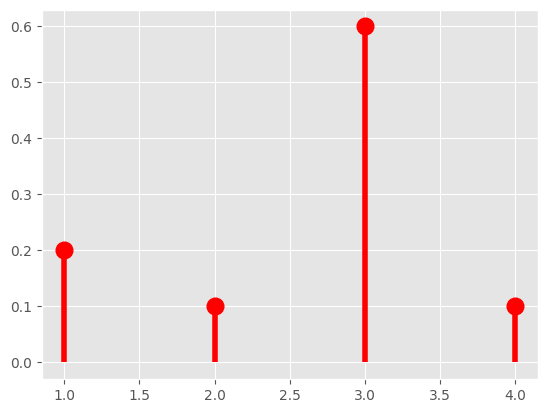

In [6]:
xk = (1,2,3,4)
pk = (.2,.1,.6,.1)

distr = st.rv_discrete(values = (xk,pk))

fig, ax = plt.subplots(1, 1)

ax.plot(xk, distr.pmf(xk), 'ro', ms=12, mec='r')

ax.vlines(xk, 0, distr.pmf(xk), colors='r', lw=4)

plt.show()

# Fördefinierade fördelningar
I SciPy finns det fördefinierade fördelningar, exempelvis Binomial fördelning.

[pmf = probability mass function (sannolikhetsfunktion)]

In [7]:
x = [1,2,3,4,5]
st.binom.pmf(x,4,0.2)

array([0.4096, 0.1536, 0.0256, 0.0016, 0.    ])

# Övning 3
$ X \sim Bin(n,p) $
* Vad har vi för värden på parametrarna?
    n = 4 p = 0.2
* Varför blir det sista elementet 0?
    5 > 4 

# Övning 4
För fördelningsfunktion används funktionen cdf.
För Poisson-fördelning används funktionen poisson.

Låt $X \sim Po(4)$

Bestäm $ F_X(2)$

In [8]:
st.poisson.cdf(2, 4)

0.23810330555354436

# Kontinuerliga fördelningar
Kontinuerliga slumpvariabler hanteras lite annorlunda av SciPy.
* Skapa ett rv-objekt med valda parametrar
* Kalla tillhörande funktioner för pmf och cdf


Med kontinuerliga variabler behöver vi diskretisera. Vi använder NumPy funktionen arange.

np.arange(undre_gräns,övre_gräns,steglängd)

### Ex

arange(0,1,0.1) = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

(Tar inte med övre gräns)

# Fördefinierade kontinuerliga fördelningar

* $Exp(\lambda)$ : expon(scale =1/lambda)
* $N(\mu,\sigma^2)$ : norm(mu,sigma)
* $U(a,b)$ : uniform($a,b$)

In [9]:
expf = st.expon(scale =2)

In [10]:
expf.cdf(6)

0.950212931632136

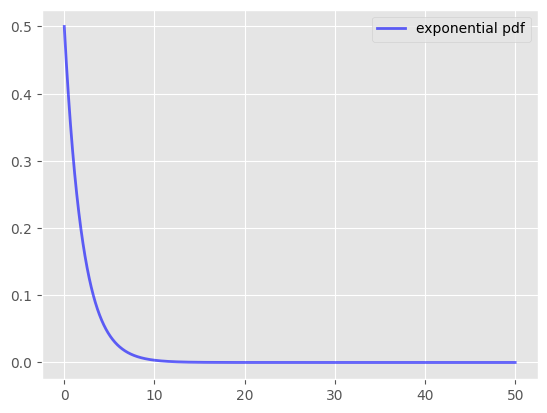

In [ ]:
x = np.arange(0,50,0.01)
fig,ax = plt.subplots(1,1)
ax.plot(x, expf.pdf(x),
       'b-', lw=2, alpha=0.6, label='exponential pdf')
ax.legend()
plt.show()

# Egen-definerad kontinuerlig fördelning

Avancerade användare kan läsa https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html

En enklare väg är att göra en vanlig python funktion, det kommer dock inte kontrollera att din funktion är en giltig pdf/cdf.

Nedan definierar vi en python funktion som både skapar täthetsfunktionen och sedan plottar den.

In [1]:
def print_expon(a):
    x = np.linspace(0,40,100)
    f = lambda x: (1/a)*np.exp(-x/a)
    plt.plot(x,f(x))

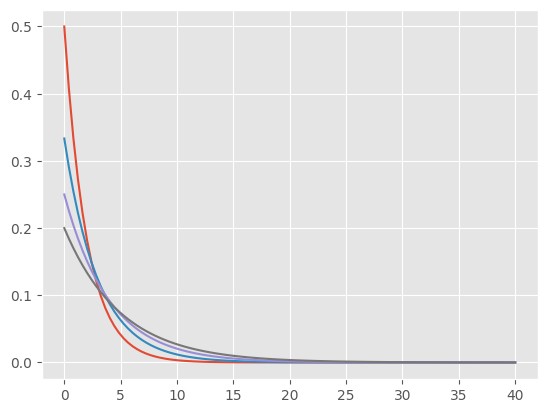

In [4]:
for a in [2,3,4,5]:
    print_expon(a)

# Fördelning vs Datamaterial
Vi vill visuellt undersöka hur nära datameterial överensstämmer med skattade fördelningar.

## Diskreta data
Nedan finns match-data för Wayne Gretzky.
Vi vill bestämma lämplig Poissonfördelning ($X\sim Po(\theta)$) för nedanstående mätserie.


In [11]:
mål = [0,1,2,3,4,5,6,7,8,9]
antal_matcher = [69, 155, 171, 143, 79, 57, 14, 6, 2, 0]
r_antal_matcher =np.multiply(antal_matcher,1/696)
theta = 2.39 # Totalt antal mål / Totalt antal matcher (skattning av theta)

In [12]:
X = st.poisson(theta) #Definiera med hjälp av statsmodels fördenfinerade fördelningar

Med hjälp av stapeldiagram kan vi jämföra den empiriska fördelningen med den skattade Poisson-fördelningen. De är väldigt lika!

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


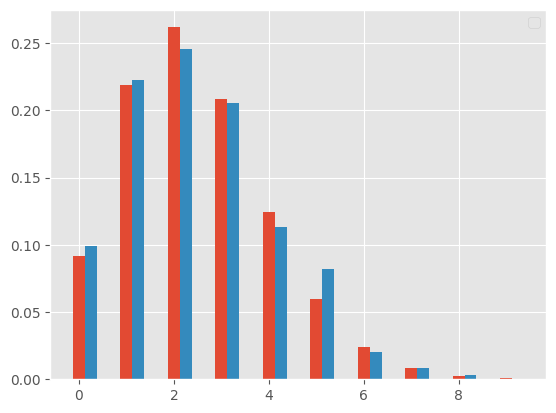

In [14]:
barwidth = .25 # bredd på staplarna
fig, ax = plt.subplots(1, 1)
mål_offset = [i + barwidth for i in mål]
ax.bar(mål, X.pmf(mål),width=barwidth)
ax.bar(mål_offset,r_antal_matcher,width = barwidth)
ax.legend()

plt.show()


## Skattad normalfördelning

Läs in filen "SMHI.csv" som en Pandas DataFrame. Notera att den är separerad med ";".

Då jag använder Colab och google drive använder jag följande kod(ni behöver använda er egen filsökväg):

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
raw_data = pd.read_csv("SMHI.csv",sep =";")

/tmp/ipykernel_4657/1951658845.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv("SMHI.csv",sep =";")


Skulle vi inte vara intresserade av säg den sista variablen "tidsutsnitt", så kan vi ta bort den enligt följande.

In [16]:
df = raw_data[raw_data.columns[:-1]]

Vi tittar närmare på variabeln lufttemperatur.

In [17]:
df["Lufttemperatur"]

0         16.2
1         23.0
2         20.2
3         19.8
4         25.8
          ... 
544083     2.3
544084     2.1
544085     2.3
544086     1.7
544087     2.4
Name: Lufttemperatur, Length: 544088, dtype: float64

Vi önskar modellera lufttemperatur med en normalfördelning, och för det behöver vi skatta medelvärde och standardavvikelse.

Vi plottar den skattade tätheten tillsammans med ett histogram, och ser att de stämmer överrens ganska bra.

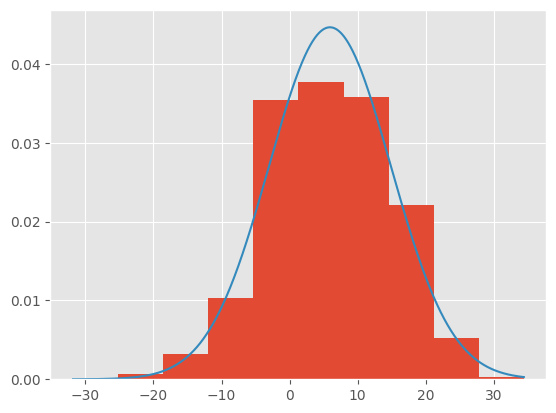

In [18]:
x_min = df["Lufttemperatur"].min()
x_max = df["Lufttemperatur"].max()
mu = df["Lufttemperatur"].mean()
sigma = df["Lufttemperatur"].std()
x = np.arange(x_min,x_max,0.01)
fig,ax = plt.subplots(1,1)
ax.hist(df.Lufttemperatur,density=True)
ax.plot(x,st.norm(mu,sigma).pdf(x))
plt.savefig("min-figur.png")
plt.show()